In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import logging

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, f1_score,precision_score, recall_score, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv('/Users/mercedesquammie/Downloads/top50 (1).csv', index_col = 0)

In [4]:
df.head()

,duration_ms,spotify_artist_popularity_mean,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,mean_segment_num_pitches,var_segment_num_pitches,mean_segment_num_pure_pitches,var_segment_num_pure_pitches,mean_segment_timbre,var_segment_timbre,num_tatums,mean_tatum_duration,var_tatum_duration,top_50
0,0.796196,-0.191681,-2.178146,0.030618,0.513133,-0.277509,0.778521,-0.806495,-0.236372,-0.153169,...,0.0,0.0,0.0,-4.440892e-16,2.273737e-13,0.0,0.0,-5.551115e-17,8.673617e-19,1
1,-1.466521,-2.022778,-0.508462,-0.921567,0.790982,-0.776142,0.778521,-0.712676,1.541868,-0.153169,...,0.0,0.0,0.0,-4.440892e-16,2.273737e-13,0.0,0.0,-5.551115e-17,8.673617e-19,1
2,-1.373778,-2.771863,0.580463,-1.216437,-0.876113,-0.665248,0.778521,-0.823191,1.656466,-0.153169,...,0.0,0.0,0.0,-4.440892e-16,2.273737e-13,0.0,0.0,-5.551115e-17,8.673617e-19,1
3,-1.283932,-2.938327,0.111895,-1.517450,-1.431812,-2.446135,0.778521,-0.870895,1.403561,-0.153169,...,0.0,0.0,0.0,-4.440892e-16,2.273737e-13,0.0,0.0,-5.551115e-17,8.673617e-19,1
4,0.287341,0.640636,0.191090,0.859939,-1.431812,1.260264,0.778521,-0.797749,-0.125726,-0.126556,...,0.0,0.0,0.0,-4.440892e-16,2.273737e-13,0.0,0.0,-5.551115e-17,8.673617e-19,1


In [5]:
df['top_50'].value_counts()

0    725
1    698
Name: top_50, dtype: int64

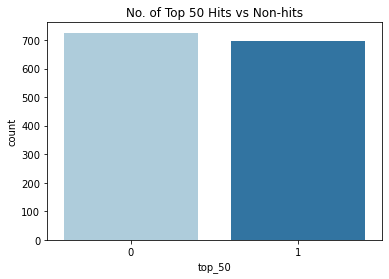

In [66]:
sns.countplot(x="top_50", data=df, palette='Paired')
plt.title('No. of Top 50 Hits vs Non-hits')
plt.savefig('top_50plot.png')

In [41]:
plt.savefig('top50plot.png')

<Figure size 432x288 with 0 Axes>

## Train Test Split

In [7]:
inputs = df.drop('top_50', axis=1).copy()
target = df['top_50']

In [8]:
X = inputs.values
y = target.values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
print("Number songs X_train dataset: ", X_train.shape)
print("Number songs y_train dataset: ", y_train.shape)
print("Number songs X_test dataset: ", X_test.shape)
print("Number songs y_test dataset: ", y_test.shape)

Number songs X_train dataset:  (1067, 112)
Number songs y_train dataset:  (1067,)
Number songs X_test dataset:  (356, 112)
Number songs y_test dataset:  (356,)


## Logistic Regression

Before hyperparameter tuning

In [11]:
lr = LogisticRegression(max_iter = 1000, random_state = 42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.51      0.61      0.56       170
           1       0.57      0.47      0.51       186

    accuracy                           0.54       356
   macro avg       0.54      0.54      0.54       356
weighted avg       0.54      0.54      0.53       356



Hyper-Parameter Tuning with GridSearch CV

In [12]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [13]:
clf = GridSearchCV(lr,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)                     # number of folds

In [14]:
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [15]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.5538502040279057


In [16]:
lr1 = LogisticRegression(C = 0.001, 
                            penalty = 'l2', 
                            solver = 'newton-cg', max_iter = 1000, random_state = 42)

In [17]:
lr1.fit(X_train,y_train)
y_pred_lr1 = lr1.predict(X_test)
print(classification_report(y_test, y_pred_lr1))
confusion_matrix(y_test, y_pred_lr1)

              precision    recall  f1-score   support

           0       0.52      0.75      0.61       170
           1       0.62      0.37      0.46       186

    accuracy                           0.55       356
   macro avg       0.57      0.56      0.54       356
weighted avg       0.57      0.55      0.53       356



array([[127,  43],
       [117,  69]])

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

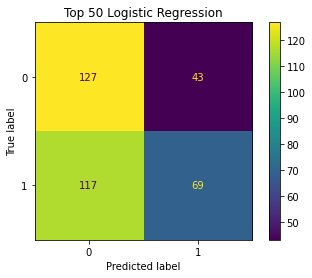

In [62]:
ConfusionMatrixDisplay.from_estimator(lr1, X_test, y_test)
plt.title('Top 50 Logistic Regression')
plt.savefig('lr50.png')
plt.show()

## SVM 

In [20]:
from sklearn import svm

In [21]:
rbf = svm.SVC(kernel='rbf', random_state = 42) #RBF Kernel

In [22]:
#Train the model using the training sets
rbf.fit(X_train, y_train)

SVC(random_state=42)

In [23]:
#Predict the response for test dataset
y_pred_rbf = rbf.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       170
           1       0.65      0.47      0.55       186

    accuracy                           0.59       356
   macro avg       0.61      0.60      0.59       356
weighted avg       0.61      0.59      0.59       356



In [25]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.519 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.519 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.533 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.521 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.521 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.521 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.547 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.565 total time=   0.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.540 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.528 total time=   0.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.565 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.507 total time=   0.2s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.545 total time=   0.2s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)


In [48]:
print("Accuracy :",grid.best_score_)

Accuracy : 0.5707560001755079


In [27]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.56      0.74      0.63       170
           1       0.66      0.46      0.54       186

    accuracy                           0.59       356
   macro avg       0.61      0.60      0.59       356
weighted avg       0.61      0.59      0.59       356



In [34]:
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=4):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), oef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

print(df.drop(['top_50'], axis = 1).columns.values)


['duration_ms' 'danceability' 'energy' 'key' 'loudness' 'mode'
 'speechiness' 'acousticness' 'instrumentalness' 'liveness' 'valence'
 'tempo' 'time_signature' 'length' 'chroma_stft_mean' 'chroma_stft_var'
 'rms_mean' 'rms_var' 'spectral_centroid_mean' 'spectral_centroid_var'
 'spectral_bandwidth_mean' 'spectral_bandwidth_var' 'rolloff_mean'
 'rolloff_var' 'zero_crossing_rate_mean' 'zero_crossing_rate_var'
 'harmony_mean' 'harmony_var' 'perceptr_mean' 'perceptr_var' 'mfcc1_mean'
 'mfcc1_var' 'mfcc2_mean' 'mfcc2_var' 'mfcc3_mean' 'mfcc3_var'
 'mfcc4_mean' 'mfcc4_var' 'mfcc5_mean' 'mfcc5_var' 'mfcc6_mean'
 'mfcc6_var' 'mfcc7_mean' 'mfcc7_var' 'mfcc8_mean' 'mfcc8_var'
 'mfcc9_mean' 'mfcc9_var' 'mfcc10_mean' 'mfcc10_var' 'mfcc11_mean'
 'mfcc11_var' 'mfcc12_mean' 'mfcc12_var' 'mfcc13_mean' 'mfcc13_var'
 'mfcc14_mean' 'mfcc14_var' 'mfcc15_mean' 'mfcc15_var' 'mfcc16_mean'
 'mfcc16_var' 'mfcc17_mean' 'mfcc17_var' 'mfcc18_mean' 'mfcc18_var'
 'mfcc19_mean' 'mfcc19_var' 'mfcc20_mean' 'mfcc20_var' 

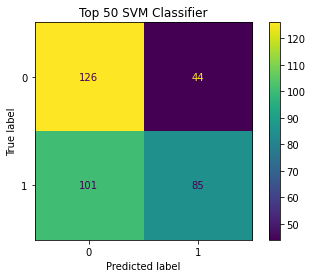

In [61]:
ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test)
plt.title('Top 50 SVM Classifier')
plt.savefig('SVM50.png')
plt.show()

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Make predictions for the test set
y_pred_forest = forest.predict(X_test)

In [32]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       170
           1       0.63      0.44      0.52       186

    accuracy                           0.57       356
   macro avg       0.59      0.58      0.57       356
weighted avg       0.59      0.57      0.57       356



In [33]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [34]:
CV_rfc = GridSearchCV(estimator=forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [35]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [49]:
print("Accuracy :",CV_rfc.best_score_)

Accuracy : 0.5904128822780923


In [50]:
CV_rfc_pred = CV_rfc.predict(X_test)
 
# print classification report
print(classification_report(y_test, CV_rfc_pred))

              precision    recall  f1-score   support

           0       0.56      0.76      0.65       170
           1       0.67      0.45      0.54       186

    accuracy                           0.60       356
   macro avg       0.62      0.61      0.59       356
weighted avg       0.62      0.60      0.59       356



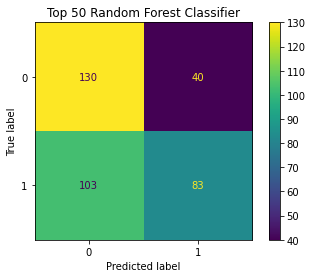

In [63]:
ConfusionMatrixDisplay.from_estimator(CV_rfc.best_estimator_, X_test, y_test)
plt.title('Top 50 Random Forest Classifier')
plt.savefig('RFC50.png')
plt.show()

In [36]:
#rfc1=RandomForestClassifier(random_state=42, criterion = 'entropy', max_features='auto', n_estimators= 200, 
                            max_depth=7)

In [37]:
#rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200,
                       random_state=42)

In [38]:
#y_pred_rfc =rfc1.predict(X_test)

In [39]:
# View the classification report for test data and predictions
#print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.56      0.76      0.65       170
           1       0.67      0.45      0.54       186

    accuracy                           0.60       356
   macro avg       0.62      0.61      0.59       356
weighted avg       0.62      0.60      0.59       356



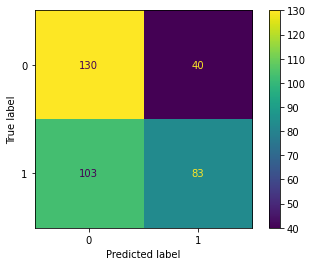

In [40]:
#ConfusionMatrixDisplay.from_estimator(rfc1, X_test, y_test)
#plt.show()